In [1]:
import pandas as pd
import pickle
import numpy as np
import json
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString

import timeit

In [2]:
acc = pd.read_pickle('data/accident.pickle')

In [38]:
acc.drop(455, axis = 0, inplace=True)

In [3]:
acc.shape

(200183, 33)

In [105]:
# New Year's Eve crash map

#fig, ax = plt.subplots(figsize = (8, 10))
#acc.plot(ax = ax, alpha = 0.4, color = 'grey')
#acc[(acc['month'] == 12) & (acc['day']== 31)].plot(ax = ax, markersize =20, color = 'red', marker = 'o', label = 'Collision')


In [106]:
# Fatality crash map (red) vs property only damage crashes (blue) map
#fig, ax = plt.subplots(figsize = (8, 10))
#acc.plot(ax = ax, alpha = 0.4, color = 'grey', markersize = 0.1)
#acc[acc['SEVERITYDESC']=='Fatality Collision'].plot(ax = ax, markersize =30, color = 'red', marker = 'o', label = 'Collision')
#acc[acc['SEVERITYDESC']=='Property Damage Only Collision'].plot(ax = ax, markersize = .01, color = 'blue', marker = 'o')

In [240]:
volume = gpd.read_file('https://opendata.arcgis.com/datasets/170b764c52f34c9497720c0463f3b58b_9.geojson')


In [245]:
volume.rename(columns={'OBJECTID': 'SEGID'},inplace=True)

In [41]:
roads = gpd.read_file('https://opendata.arcgis.com/datasets/383027d103f042499693da22d72d10e3_0.geojson')

In [84]:
len(acc['FIRST_STNAME_ORD'].unique())

499

In [85]:
len(volume['FIRST_STNAME_ORD'].unique())

501

In [165]:
acc.head()

,OBJECTID,ADDRTYPE,LOCATION,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,...,time,year,month,day,dayofweek,hour,FIRST_STNAME_ORD,AWDT_ROUND,DOWNTOWN,SEGID
0,1,Intersection,GREEN LAKE WAY N AND N 46TH ST,1,Property Damage Only Collision,Angles,2,0,0,2,...,2018-03-26 12:50:00,2018,3,26,0,12,NE 50TH ST,23700.0,N,519
1,2,Block,LAKE CITY WAY NE BETWEEN NE 125TH ST AND NE 12...,1,Property Damage Only Collision,Other,1,0,0,1,...,2018-03-23 03:30:00,2018,3,23,4,3,NE 145TH ST,38000.0,N,96
2,3,Block,1ST AVE NE BETWEEN NE 50TH ST AND NE 51ST ST,1,Property Damage Only Collision,Parked Car,2,0,0,2,...,2018-03-24 15:00:00,2018,3,24,5,15,NE 50TH ST,24600.0,N,518
3,4,Block,25TH AVE NE BETWEEN NE BLAKELEY ST AND NE 54TH ST,1,Property Damage Only Collision,Parked Car,2,0,0,2,...,2018-03-22 17:14:00,2018,3,22,3,17,25TH AVE NE,18000.0,N,467
4,5,Block,N 36TH ST BETWEEN PHINNEY AVE N AND FRANCIS AVE N,1,Property Damage Only Collision,Parked Car,2,0,0,2,...,2018-03-25 02:03:00,2018,3,25,6,2,NW 36TH ST,22600.0,N,615


In [211]:
#s = acc.groupby(['year', 'SEGID'])['AWDT_ROUND'].sum()

In [235]:
#volume = s.loc[[2016]]
#volume

In [247]:
y16 = acc[acc['year']==2016]

In [251]:
# total traffic volume by road segment for 2016 
count16 = y16.groupby('SEGID')['AWDT_ROUND'].count().to_frame(name = 'count')


In [252]:
volume = volume.merge(count16, on = 'SEGID')

In [253]:
volume['rate'] = volume['count']/(volume['AWDT_ROUND']*365)


In [262]:
y = np.random.randint(1,60, size = 1653)


5.0228310502283106e-05

Text(0.5, 15.0, 'Longitude')

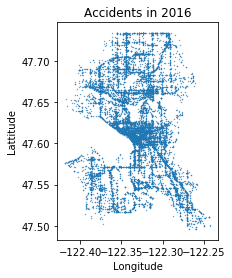

In [49]:
acc[acc['year']==2016].plot(markersize = 0.1)
plt.title('Accidents in 2016')
plt.ylabel('Lattitude')
plt.xlabel('Longitude')

In [60]:
acc.SEVERITYDESC.unique()

array(['Property Damage Only Collision', 'Unknown', 'Injury Collision',
       'Serious Injury Collision', 'Fatality Collision'], dtype=object)

In [31]:
acc.columns

Index(['OBJECTID', 'ADDRTYPE', 'LOCATION', 'SEVERITYCODE', 'SEVERITYDESC',
       'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
       'INJURIES', 'SERIOUSINJURIES', 'FATALITIES', 'INCDATE', 'INCDTTM',
       'JUNCTIONTYPE', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'HITPARKEDCAR', 'geometry', 'datetime', 'time', 'year', 'month', 'day',
       'dayofweek', 'hour', 'FIRST_STNAME_ORD', 'AWDT_ROUND', 'DOWNTOWN',
       'SEGID'],
      dtype='object')

In [ ]:
# nearest road blocks to each road segment
dist = []
for segment in volume.geometry:
    d = []
    for block in roads.geometry:
        d.append(segment.distance(block))
    d = np.array(d)
    dist.append(d.argmin())

In [56]:
y16[['dayofweek', 'FATALITIES']].groupby('dayofweek').sum()

,FATALITIES
dayofweek,
0,2
1,4
2,3
3,5
4,6
5,4
6,2


In [98]:
y16 = acc[acc['year']== 2016]

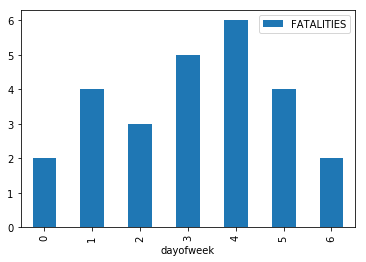

In [55]:
# Fatalities bar plot in 2016 by day of week
y16[['dayofweek', 'FATALITIES']].groupby('dayofweek').sum().plot(kind = 'bar')

Text(0.5, 69.0, 'Longitude')

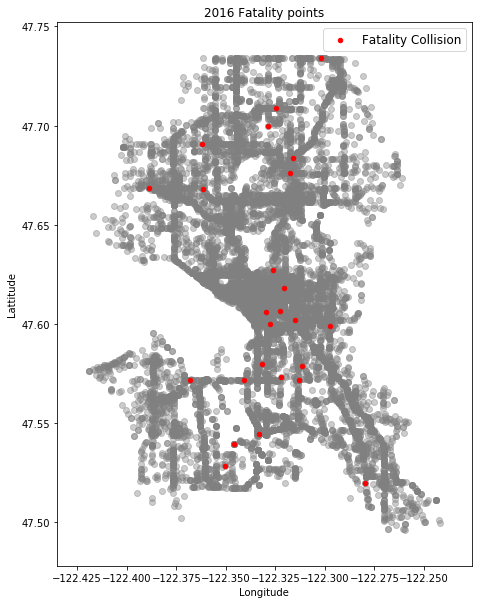

In [118]:
# Fatality accident points in 2016

fig, ax = plt.subplots(figsize = (8, 10))
y16.plot(ax = ax, alpha = 0.4, color = 'grey')
y16[y16['SEVERITYDESC']=='Fatality Collision'].plot(ax = ax, markersize =20, color = 'red', marker = 'o', label = 'Fatality Collision')
plt.legend(prop = {'size':12})
plt.title('2016 Fatality points')
plt.ylabel('Lattitude')
plt.xlabel('Longitude')



Text(0.5, 69.0, 'Longitude')

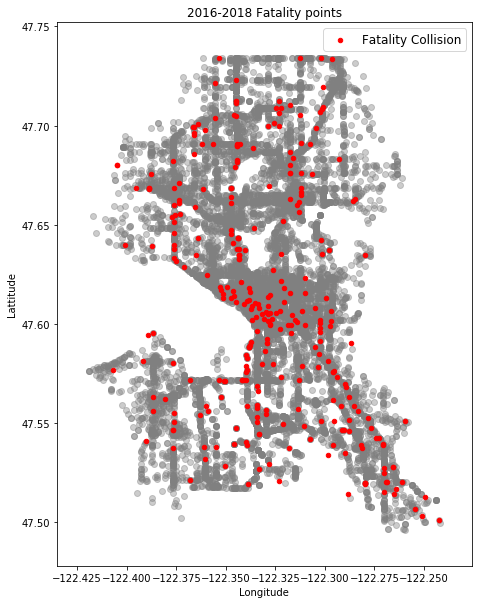

In [66]:
# Fatality accident points in 2016

fig, ax = plt.subplots(figsize = (8, 10))
y16.plot(ax = ax, alpha = 0.4, color = 'grey')
acc[acc['SEVERITYDESC']=='Fatality Collision'].plot(ax = ax, markersize =20, color = 'red', marker = 'o', label = 'Fatality Collision')
plt.legend(prop = {'size':12})
plt.title('2016-2018 Fatality points')
plt.ylabel('Lattitude')
plt.xlabel('Longitude')

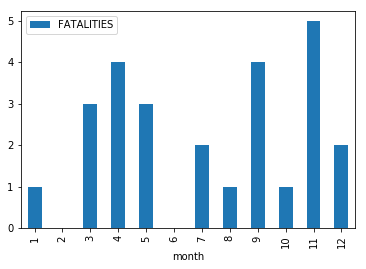

In [51]:
y16[['month', 'FATALITIES']].groupby('month').sum().plot(kind = 'bar')

Text(0, 0.5, 'Number of accidents')

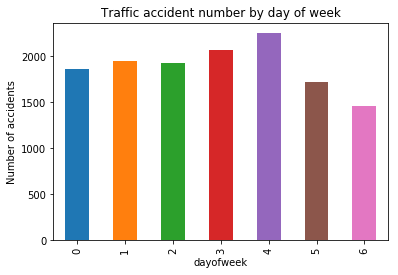

In [48]:
y16.groupby(y16['dayofweek']).SEVERITYDESC.count().plot(kind = 'bar')
plt.title("Traffic accident number by day of week")
plt.ylabel('Number of accidents')

In [111]:
fatalities = acc[acc['SEVERITYDESC']=='Fatality Collision']

In [113]:
fatalities.columns

Index(['OBJECTID', 'ADDRTYPE', 'LOCATION', 'SEVERITYCODE', 'SEVERITYDESC',
       'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
       'INJURIES', 'SERIOUSINJURIES', 'FATALITIES', 'INCDATE', 'INCDTTM',
       'JUNCTIONTYPE', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'HITPARKEDCAR', 'geometry', 'datetime', 'time', 'year', 'month', 'day',
       'dayofweek', 'hour', 'FIRST_STNAME_ORD', 'AWDT_ROUND', 'DOWNTOWN',
       'SEGID'],
      dtype='object')

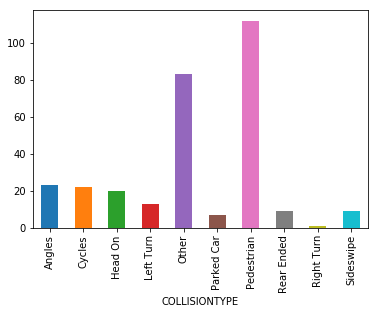

In [114]:
fatalities.groupby('COLLISIONTYPE')['FATALITIES'].count().plot(kind = 'bar')

Text(0.5, 69.0, 'Longitude')

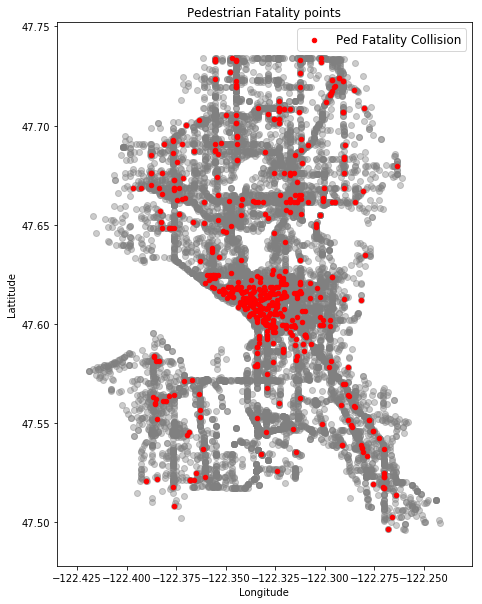

In [127]:
# Pedestrian Fatality accident points in 2016

fig, ax = plt.subplots(figsize = (8, 10))
y16.plot(ax = ax, alpha = 0.4, color = 'grey')
y16[y16['COLLISIONTYPE']=='Pedestrian'].plot(ax = ax, markersize =20, color = 'red', marker = 'o', label = 'Ped Fatality Collision')
#y16[y16['SEVERITYDESC']=='Fatilaty'].plot(ax = ax, markersize =20, color = 'blue', marker = 'o', label = 'Fatality Collision')

plt.legend(prop = {'size':12})
plt.title('Pedestrian Fatality points')
plt.ylabel('Lattitude')
plt.xlabel('Longitude')

Text(0.5, 69.0, 'Longitude')

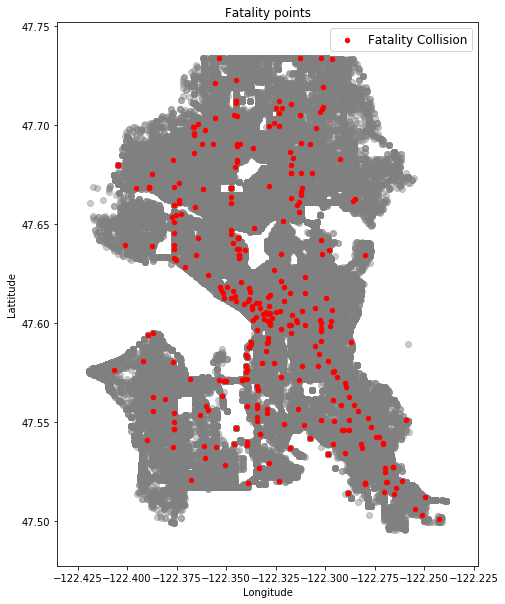

In [128]:
# Pedestrian Fatality accident points in 2004 - 2018

fig, ax = plt.subplots(figsize = (8, 10))
acc.plot(ax = ax, alpha = 0.4, color = 'grey')
fatalities.plot(ax = ax, markersize =20, color = 'red', marker = 'o', label = 'Fatality Collision')
#y16[y16['SEVERITYDESC']=='Fatilaty'].plot(ax = ax, markersize =20, color = 'blue', marker = 'o', label = 'Fatality Collision')

plt.legend(prop = {'size':12})
plt.title('Fatality points')
plt.ylabel('Lattitude')
plt.xlabel('Longitude')

In [124]:
fatalities[fatalities['COLLISIONTYPE']=='Pedestrian'].shape

(112, 33)

In [125]:
fatalities.shape

(309, 33)

In [126]:
112/309

0.36245954692556637